Tech Titans vs Market Volatility

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("data/tech_vs_index_prices.csv", index_col='Date', parse_dates=True)
df.head()

,AAPL,MSFT,TSLA,NVDA,^GSPC,^IXIC
Date,,,,,,
2010-01-04,6.431897,23.211437,NaN,0.423883,1132.989990,2308.419922
2010-01-05,6.443016,23.218939,NaN,0.430073,1136.520020,2308.709961
2010-01-06,6.340533,23.076437,NaN,0.432824,1137.140015,2301.090088
2010-01-07,6.328812,22.836460,NaN,0.424342,1141.689941,2300.050049
2010-01-08,6.370887,22.993952,NaN,0.425259,1144.979980,2317.169922


In [8]:
# Check for missing values
df.isna().sum()

# Drop rows with all NaNs across columns
df = df.dropna(how='all')

# Optional: forward-fill remaining small gaps
df = df.ffill()
df.head()

,AAPL,MSFT,TSLA,NVDA,^GSPC,^IXIC
Date,,,,,,
2010-01-04,6.431897,23.211437,NaN,0.423883,1132.989990,2308.419922
2010-01-05,6.443016,23.218939,NaN,0.430073,1136.520020,2308.709961
2010-01-06,6.340533,23.076437,NaN,0.432824,1137.140015,2301.090088
2010-01-07,6.328812,22.836460,NaN,0.424342,1141.689941,2300.050049
2010-01-08,6.370887,22.993952,NaN,0.425259,1144.979980,2317.169922


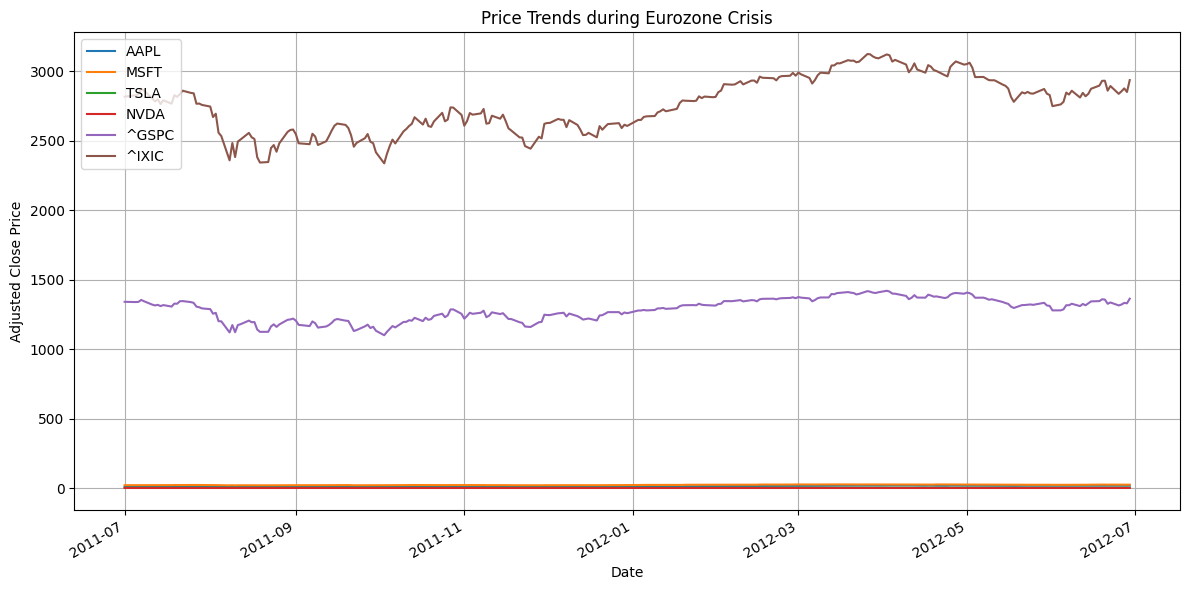

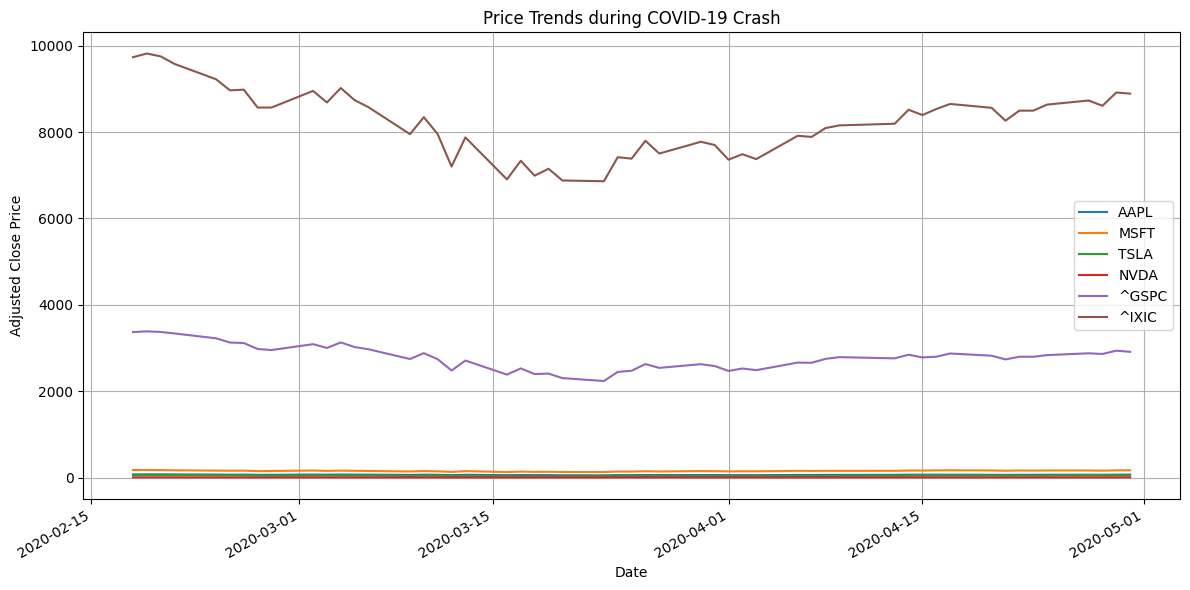

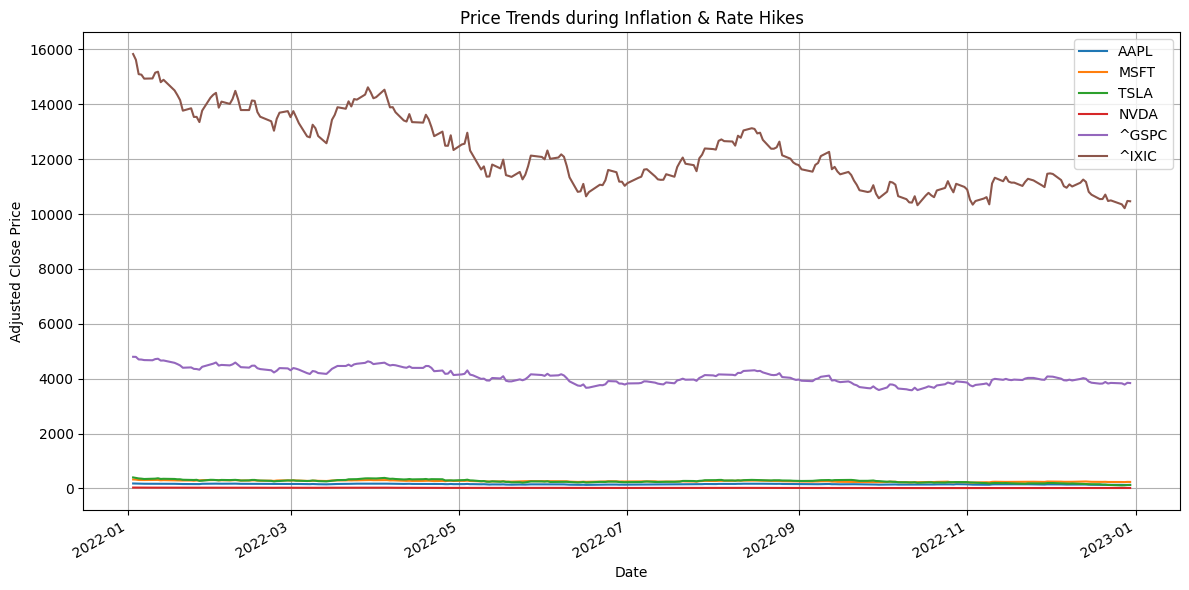

In [9]:
stress_periods = {
    "Eurozone Crisis": ("2011-07-01", "2012-06-30"),
    "COVID-19 Crash": ("2020-02-15", "2020-04-30"),
    "Inflation & Rate Hikes": ("2022-01-01", "2022-12-31")
}

# Plot price trends for each period
for name, (start, end) in stress_periods.items():
    plt.figure(figsize=(12, 6))
    df.loc[start:end].plot(ax=plt.gca())
    plt.title(f"Price Trends during {name}")
    plt.ylabel("Adjusted Close Price")
    plt.xlabel("Date")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

To understand whether tech stocks behave as resilient or risky assets during financial stress, we examined price trends during three major crises: the Eurozone Crisis (2011–2012), the COVID-19 Crash (2020), and the Inflation & Rate Hikes (2022).

**1. Eurozone Crisis (2011–2012)**  
Market indices (^GSPC, ^IXIC) experienced a clear downturn, while most U.S. tech stocks (AAPL, MSFT) remained relatively stable. This suggests early investor confidence in large tech firms despite global macroeconomic stress, indicating possible defensive behavior.

**2. COVID-19 Crash (2020)**  
All assets dropped sharply in March 2020, but tech stocks—especially NVDA and TSLA—recovered quickly and exceeded their pre-crisis levels. This rapid rebound reflects investor perception of tech as essential and growth-driven, supporting the flight-to-quality theory.

**3. Inflation & Rate Hikes (2022)**  
Persistent declines are visible across all assets. More volatile behavior in TSLA and NVDA contrasts with the steadier performance of AAPL and MSFT, suggesting that not all tech stocks behave equally. Investor risk tolerance narrowed during this period, reflecting sensitivity to monetary tightening.

In [10]:
returns = df.pct_change().dropna()


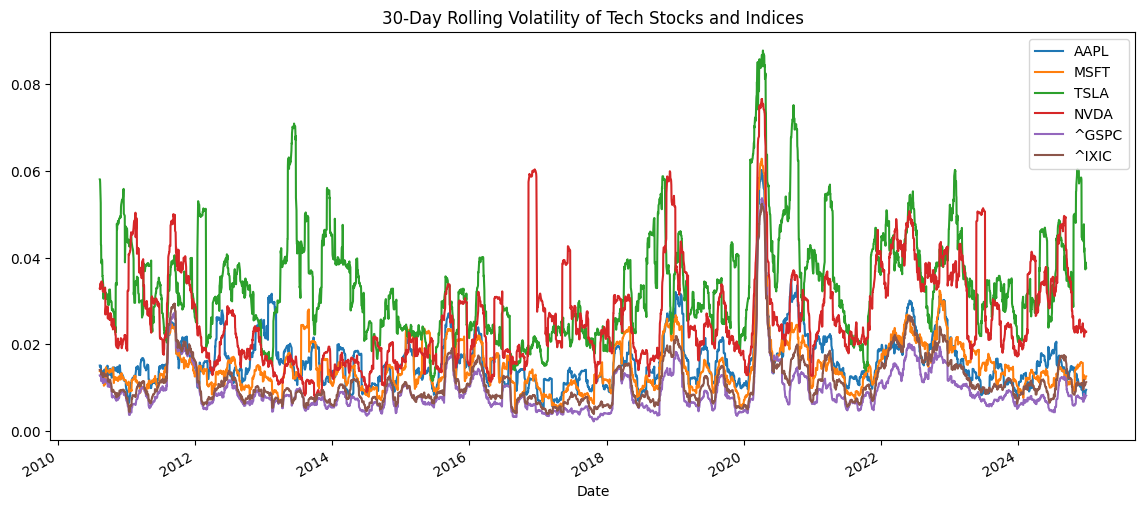

In [11]:
rolling_volatility = returns.rolling(window=30).std()
rolling_volatility.plot(figsize=(14,6), title="30-Day Rolling Volatility of Tech Stocks and Indices")
plt.show()


This chart displays 30-day rolling volatility for each stock and index. TSLA and NVDA consistently exhibit higher volatility compared to AAPL and MSFT, confirming their riskier profile. Notably, spikes are observed during global stress events such as COVID-19 (2020), inflation & rate hikes (2022), and earlier Eurozone tremors (2011–2012). In contrast, indices (^GSPC and ^IXIC) display more stable volatility, reinforcing their role as diversified benchmarks.

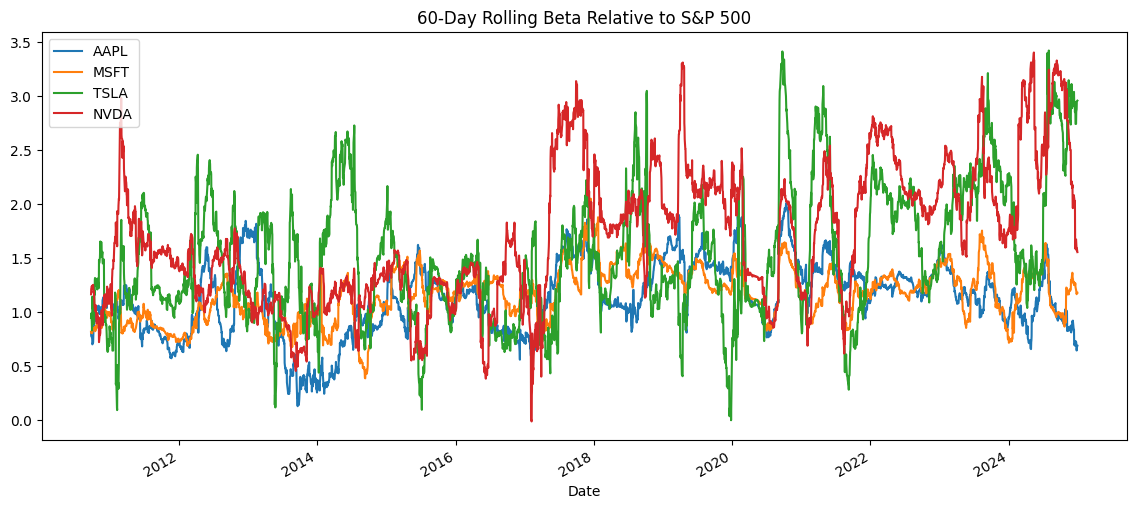

In [12]:
def compute_rolling_beta(stock_returns, market_returns, window=60):
    beta = stock_returns.rolling(window).cov(market_returns) / market_returns.rolling(window).var()
    return beta

betas = pd.DataFrame(index=returns.index)
for ticker in ['AAPL', 'MSFT', 'TSLA', 'NVDA']:
    betas[ticker] = compute_rolling_beta(returns[ticker], returns['^GSPC'])

betas.plot(figsize=(14,6), title="60-Day Rolling Beta Relative to S&P 500")
plt.show()


The chart shows how the market sensitivity (beta) of tech stocks changes over time relative to the S&P 500. TSLA and NVDA often exceed a beta of 2 during volatile periods, meaning their movements amplify market fluctuations. AAPL and MSFT stay closer to or below 1.5, indicating more moderate correlation and lower systematic risk. This highlights structural differences in risk exposure among major tech firms.